# Import the libraries

In [44]:
from tensorflow.keras import layers
import os, shutil
from keras.models import Sequential
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import itertools
from tensorflow.keras import regularizers

# Load the data

In [2]:
current_directory = os.getcwd()
print("Current Directory:", current_directory)

Current Directory: C:\Users\MBR\Desktop\Coursat.ai\Deep Learning in Computer Vision\my work


In [3]:
# The directory where we will store our smaller dataset
base_dir = 'dataset\\cats_and_dogs_small'
try:
  os.mkdir(base_dir)
except:
  pass

In [4]:
# Directories for our training, validation and test splits
# train
train_dir = os.path.join(base_dir, 'train')
try:
  os.mkdir(train_dir)
except:
  pass  
# validate
validation_dir = os.path.join(base_dir, 'validation')
try:
  os.mkdir(validation_dir)
except:
  pass   
# test
test_dir = os.path.join(base_dir, 'test')
try:
  os.mkdir(test_dir)
except:
  pass   

In [5]:
# training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')
try:
  os.mkdir(train_cats_dir)
except:
  pass   

# training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')
try:
  os.mkdir(train_dogs_dir)
except:
  pass   

# validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
try:
  os.mkdir(validation_cats_dir)
except:
  pass 

# validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
try:
  os.mkdir(validation_dogs_dir)
except:
  pass   

# testing cat pictures
test_cats_dir = os.path.join(test_dir, 'cats')
try:
  os.mkdir(test_cats_dir)
except:
  pass   

# testing dog pictures
test_dogs_dir = os.path.join(test_dir, 'dogs')
try:
  os.mkdir(test_dogs_dir)
except:
  pass   

In [6]:
original_dataset_dir_cats = 'dataset\\cats_and_dogs_filtered\\train\\cats'
original_dataset_dir_dogs = 'dataset\\cats_and_dogs_filtered\\train\\dogs'
# Copy first 1000 cat images to train_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(0, 1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_cats, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

# Copy next 500 cat images to validation_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_cats, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 cat images to test_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_cats, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy first 1000 dog images to train_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_dogs, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 dog images to validation_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_dogs, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 dog images to test_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_dogs, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

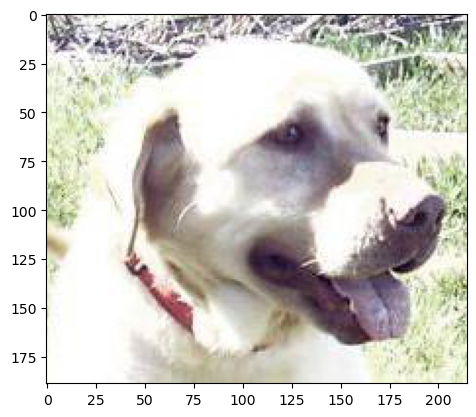

In [7]:
import matplotlib.pyplot as plt
plt.imshow(plt.imread(src))

# Building our Network

In [24]:
model = Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [25]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 17, 17, 128)      

In [26]:
model.compile(
    loss='binary_crossentropy',
    optimizer=optimizers.RMSprop(learning_rate=0.001),
    metrics=['accuracy']
)

# Data Preprocessing

In [12]:
train_data = ImageDataGenerator(
    rescale=1./255
)
test_data = ImageDataGenerator(
    rescale=1./255
)

In [13]:
train_directory = r"C:\Users\MBR\Desktop\Coursat.ai\Deep Learning in Computer Vision\my work\dataset\cats_and_dogs_small\train"
train_generator = train_data.flow_from_directory(
    train_directory,
    target_size=(150, 150),
    class_mode='binary',
    batch_size=32,
    shuffle=True,
    interpolation='nearest',
)

Found 2000 images belonging to 2 classes.


In [14]:
test_directory = r"C:\Users\MBR\Desktop\Coursat.ai\Deep Learning in Computer Vision\my work\dataset\cats_and_dogs_small\test"
test_generator = test_data.flow_from_directory(
    test_directory,
    target_size=(150, 150),
    class_mode='binary',
    batch_size=32,
    shuffle=True,
    interpolation='nearest',
)

Found 1000 images belonging to 2 classes.


In [15]:
validation_directory = r"C:\Users\MBR\Desktop\Coursat.ai\Deep Learning in Computer Vision\my work\dataset\cats_and_dogs_small\validation"
validation_generator = test_data.flow_from_directory(
    validation_directory,
    target_size=(150, 150),
    class_mode='binary',
    batch_size=32,
    shuffle=True,
    interpolation='nearest',
)

Found 1000 images belonging to 2 classes.


# Train the Model

In [27]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=15,
    validation_data=validation_generator,
    validation_steps=len(validation_generator),
)

Epoch 1/15
63/63 [==============================] - 29s 452ms/step - loss: 0.7062 - accuracy: 0.4905 - val_loss: 0.6924 - val_accuracy: 0.5850
Epoch 2/15
63/63 [==============================] - 31s 494ms/step - loss: 0.6898 - accuracy: 0.5365 - val_loss: 0.6848 - val_accuracy: 0.6070
Epoch 3/15
63/63 [==============================] - 32s 505ms/step - loss: 0.6791 - accuracy: 0.5835 - val_loss: 0.6619 - val_accuracy: 0.5960
Epoch 4/15
63/63 [==============================] - 32s 505ms/step - loss: 0.6649 - accuracy: 0.6185 - val_loss: 0.6132 - val_accuracy: 0.6820
Epoch 5/15
63/63 [==============================] - 31s 482ms/step - loss: 0.6202 - accuracy: 0.6600 - val_loss: 0.5974 - val_accuracy: 0.6590
Epoch 6/15
63/63 [==============================] - 32s 503ms/step - loss: 0.5927 - accuracy: 0.6770 - val_loss: 0.5728 - val_accuracy: 0.6940
Epoch 7/15
63/63 [==============================] - 32s 502ms/step - loss: 0.5343 - accuracy: 0.7360 - val_loss: 0.6021 - val_accuracy: 0.6580

In [38]:
model.save('cats_and_dogs_small_1.h5')

In [34]:
preds = model.predict(validation_generator)

32/32 [==============================] - 4s 129ms/step


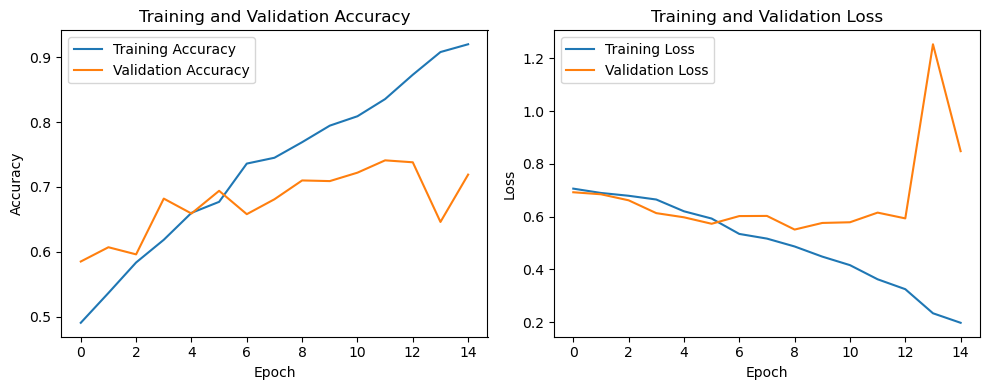

In [39]:
# Plot training and validation accuracy
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [40]:
# Evaluate the model on the validation data
validation_predictions = model.predict(validation_generator)
validation_labels = np.concatenate([validation_generator[i][1] for i in range(len(validation_generator))])
validation_predictions_binary = np.round(validation_predictions)

# Calculate confusion matrix
conf_matrix = confusion_matrix(validation_labels, validation_predictions_binary)

# Define class labels (modify according to your dataset)
class_labels = ['Cat', 'Dog']

32/32 [==============================] - 4s 114ms/step


In [41]:
# Plot confusion matrix
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
Normalized confusion matrix


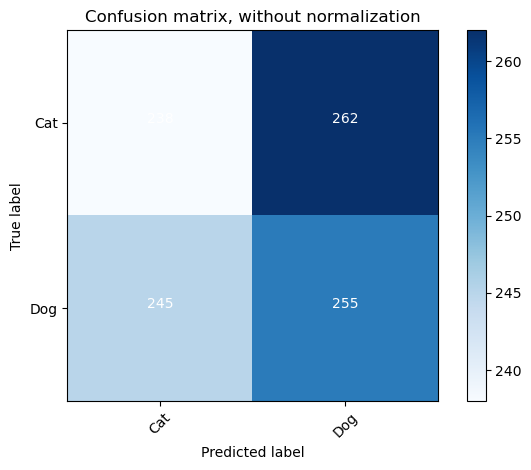

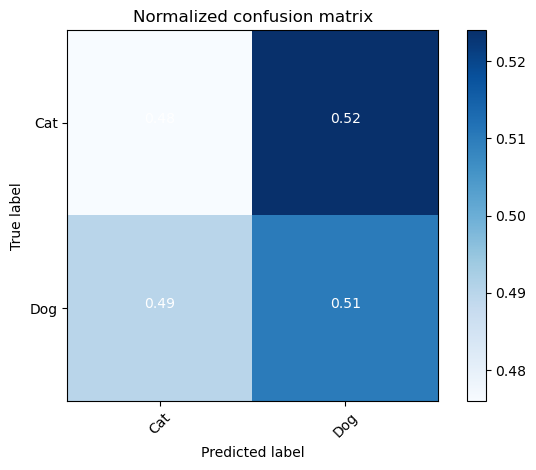

In [42]:
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(conf_matrix, classes=class_labels, title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(conf_matrix, classes=class_labels, normalize=True, title='Normalized confusion matrix')

plt.show()

# Dealing with Overfitting
    - using Data augmentation

In [52]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_directory,
    target_size=(150, 150),
    batch_size=20,
    
    class_mode='binary'# Since we use binary_crossentropy loss, we need binary labels
)

validation_generator = test_datagen.flow_from_directory(
    validation_directory,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [47]:
model = Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [48]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 74, 74, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 36, 36, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_14 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 17, 17, 128)      

In [50]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

In [53]:
early_stopping_callback = EarlyStopping(
    monitor='val_loss',
    min_delta=0.001,
    patience=5,
    verbose=1,
)

In [57]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=100,
    validation_data=validation_generator,
    validation_steps=len(validation_generator),
    callbacks=[early_stopping_callback]
)

C:\Users\MBR\AppData\Local\Temp\ipykernel_15088\3761909917.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/100
100/100 [==============================] - 36s 350ms/step - loss: 1.5891 - acc: 0.5135 - val_loss: 1.5340 - val_acc: 0.5050
Epoch 2/100
100/100 [==============================] - 35s 352ms/step - loss: 1.4858 - acc: 0.5260 - val_loss: 1.4305 - val_acc: 0.5190
Epoch 3/100
100/100 [==============================] - 44s 444ms/step - loss: 1.3885 - acc: 0.5665 - val_loss: 1.3774 - val_acc: 0.5070
Epoch 4/100
100/100 [==============================] - 71s 708ms/step - loss: 1.3061 - acc: 0.5875 - val_loss: 1.2506 - val_acc: 0.6210
Epoch 5/100
100/100 [==============================] - 59s 593ms/step - loss: 1.2305 - acc: 0.6030 - val_loss: 1.1812 - val_acc: 0.6130
Epoch 6/100
100/100 [==============================] - 55s 550ms/step - loss: 1.1616 - acc: 0.6145 - val_loss: 1.1573 - val_acc: 0.5440
Epoch 7/100
100/100 [==============================] - 55s 550ms/step - loss: 1.0940 - acc: 0.6340 - val_loss: 1.0635 - val_acc: 0.6320
Epoch 8/100
100/100 [===========================

In [58]:
model.save('cats_and_dogs_small_2.h5')

C:\Users\MBR\anaconda3\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


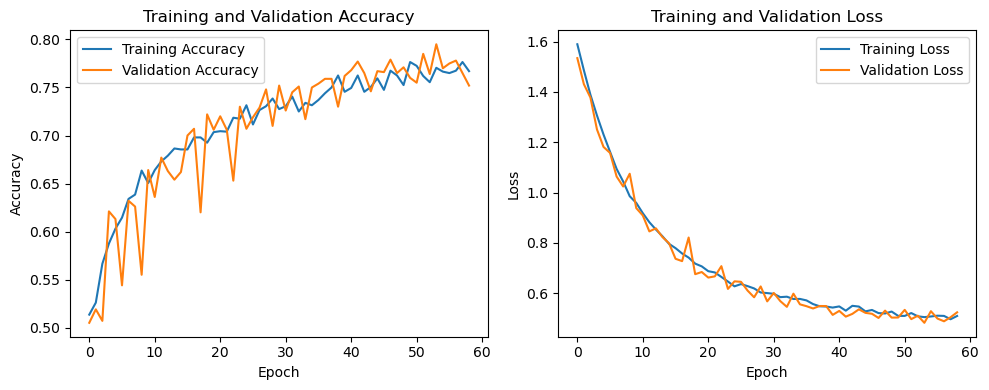

In [61]:
# Plot training and validation accuracy
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['acc'], label='Training Accuracy')
plt.plot(history.history['val_acc'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()